In [1]:
#Needed imports and boilerplate
from glob import glob
import afidutils
import pandas as pd

#Analysis Parameters 
midpoint='PMJ' #assign a midpoint for ACPC transformation

In [2]:
#load coordiante data from the afids data dataset
afid_fcsv = sorted(glob(f'/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/*/afids_groundtruth/sub-*/anat/sub-*desc-groundtruth_afids.fcsv'))
print(f'number of subjects with AFID annotations: {len(afid_fcsv)}')
stn_df = pd.read_csv('/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/STN/STN_all.csv')
print(f'number of subjects with STN annotations: {len(stn_df)//2}')

number of subjects with AFID annotations: 201
number of subjects with STN annotations: 70


In [33]:
# Need to run this once to tranform coordinates into ACPC space and save outputs.
for afid_file in afid_fcsv:
  subject_id = afidutils.extract_sub_metadata(afid_file)
  print(subject_id[0]) #extract subject id from function output

  stn_df_subjects = stn_df[['subjid']].to_numpy()
  
  matching_entries = [subjid[0] for subjid in stn_df_subjects if subject_id[0] in subjid[0]]
  coords_stn = stn_df[stn_df['subjid'].str.contains(subject_id[0], na=False)][["centroid_x","centroid_y","centroid_z"]].to_numpy()
  print (f'Target Coordinates: \n {coords_stn}')

  

sub-01
Target Coordinates: 
 [[-10.2717   25.2001   13.5802 ]
 [  9.95442  25.1775   12.0361 ]]
sub-02
Target Coordinates: 
 [[-8.51599 19.1185   8.33398]
 [11.4459  20.2445   8.20792]]
sub-03
Target Coordinates: 
 [[ -6.75441  20.9804  -17.6547 ]
 [ 12.9332   19.7491  -16.6896 ]]
sub-04
Target Coordinates: 
 [[-11.6816   37.1169    4.72863]
 [ 11.0437   41.1537    6.34567]]
sub-05
Target Coordinates: 
 [[-7.38121 30.1683  -7.23315]
 [10.0886  31.9149  -7.23698]]
sub-06
Target Coordinates: 
 [[-9.93778  20.2451    0.821535]
 [10.4217   19.0043    1.57182 ]]
sub-07
Target Coordinates: 
 [[ -9.33155  34.3658  -10.2913 ]
 [ 13.2538   34.4213  -11.3005 ]]
sub-08
Target Coordinates: 
 [[-8.80798 31.7085  -9.14269]
 [11.2342  30.2615  -9.14065]]
sub-09
Target Coordinates: 
 [[-7.2077  28.8021   7.8062 ]
 [13.4719  27.151    7.39882]]
sub-10
Target Coordinates: 
 [[-8.91285 32.6917  -4.7569 ]
 [13.9707  35.068   -6.06229]]
sub-01
Target Coordinates: 
 [[-10.2717   25.2001   13.5802 ]
 [  9.95

In [23]:
subject_id[0]

'sub-01'

'/Users/alaataha/Documents/GitHub/afids-pred/figures/check.html'

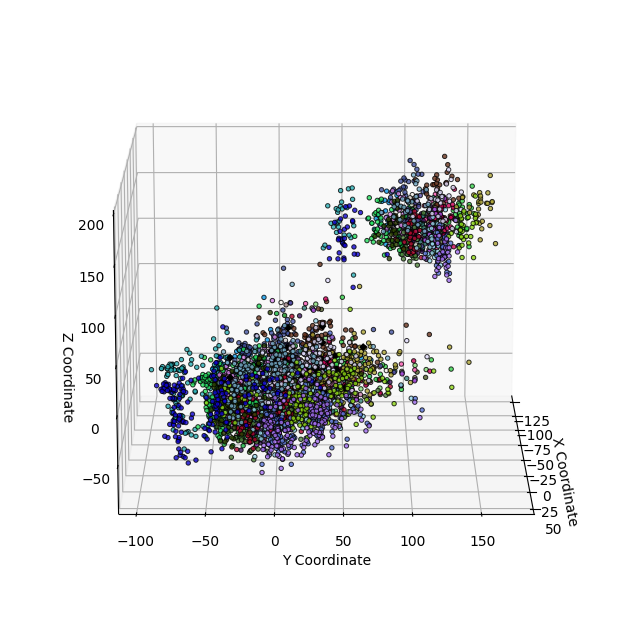

In [7]:
afidutils.plot_multiple_files(afid_fcsv,'/Users/alaataha/Documents/GitHub/afids-pred/figures/check.html',trace_lines=False)